<a href="https://colab.research.google.com/github/ahmedfarazsyk/programming_projects/blob/master/AI_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Essential Python libraries

In [ ]:
!python --version

Python 3.12.11


In [ ]:
# Basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# NLP libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Text Preprocessing Libraries
!pip install contractions -q
import contractions
import re
!pip install textacy
from textacy import preprocessing

# Visualization Libraries
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
from googleapiclient.discovery import build

# Pretrained Model
!pip install transformers -q
import transformers
from transformers import pipeline

nltk.download("punkt_tab")
nltk.download("wordnet")
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Get YouTube video data

In [ ]:
#Authenticate with your youtube api key
api_key = "YOUTUBE_API_KEY"
youtube = build("youtube", "v3", developerKey=api_key)

In [ ]:
#Fuction to fetch comments from youtube video
def get_comments(video_id):
  comments = []
  authors = []
  author_urls = []
  likes = []
  publishes = []
  updates = []

  request = youtube.commentThreads().list(
      part = "snippet",
      videoId = video_id,
      textFormat = "plainText"
  )
  while request:
    response = request.execute()
    for item in response["items"]:
      comment = item["snippet"]["topLevelComment"]["snippet"]["textDisplay"]
      author = item["snippet"]["topLevelComment"]["snippet"]["authorDisplayName"]
      author_url = item["snippet"]["topLevelComment"]["snippet"]["authorChannelUrl"]
      like = item["snippet"]["topLevelComment"]["snippet"]["likeCount"]
      publish = item["snippet"]["topLevelComment"]["snippet"]["publishedAt"]
      update = item["snippet"]["topLevelComment"]["snippet"]["updatedAt"]

      comments.append(comment)
      authors.append(author)
      author_urls.append(author_url)
      likes.append(like)
      publishes.append(publish)
      updates.append(update)

      request = youtube.commentThreads().list_next(request, response)


  return authors, author_urls, comments, likes, publishes, updates

In [ ]:
#Example usage to fetch comments from youtube video
video_Id = "QPLYWyq-VZc" #Enter any video link
authors, author_urls, comments, likes, publishes, updates = get_comments(video_Id)

In [ ]:
#Creating a dataframe from scraped data
comments_analytics = pd.DataFrame({"Authors":authors, "Author Urls":author_urls, "Comments":comments,
                                   "Likes":likes, "Published At":publishes, "Updated At":updates})

In [ ]:
comments_analytics

Authors                                  Author Urls  \
0              @F1sh_king            http://www.youtube.com/@F1sh_king   
1         @johnmaynard869       http://www.youtube.com/@johnmaynard869   
2      @AbsoluteMathMagic    http://www.youtube.com/@AbsoluteMathMagic   
3           @majortom4543         http://www.youtube.com/@majortom4543   
4       @CubingEmperor313     http://www.youtube.com/@CubingEmperor313   
..                    ...                                          ...   
778        @DreamyDaylite        http://www.youtube.com/@DreamyDaylite   
779      @loughlinlee2366      http://www.youtube.com/@loughlinlee2366   
780            @nerdporks            http://www.youtube.com/@nerdporks   
781  @scramblerbricks7293  http://www.youtube.com/@scramblerbricks7293   
782    @jacksontisler8333    http://www.youtube.com/@jacksontisler8333   

                                              Comments  Likes  \
0                                  I miss her so much.      2   
1    I love seeing the light of possibilities when ...      0   
2    The original name of this effect is "The Nine ...      0   
3                               I miss my physics girl      8   
4                                                 loll      0   
..                                                 ...    ...   
778                                    First or not :V      0   
779                                              First      0   
780                                   My DONG is ready      0   
781                                             First!      0   
782                                                 1?      2   

             Published At            Updated At  
0    2024-08-12T09:08:12Z  2024-08-12T09:08:12Z  
1    2024-07-10T01:03:29Z  2024-07-10T01:03:29Z  
2    2024-05-20T02:35:47Z  2024-05-20T02:35:47Z  
3    2024-01-29T09:39:19Z  2024-01-29T09:39:19Z  
4    2023-12-31T02:41:22Z  2023-12-31T02:41:22Z  
..                    ...                   ...  
778  2018-06-19T00:35:40Z  2018-06-19T00:35:40Z  
779  2018-06-19T00:35:37Z  2018-06-19T00:35:37Z  
780  2018-06-19T00:35:37Z  2018-06-19T00:35:37Z  
781  2018-06-19T00:35:28Z  2018-06-19T00:35:28Z  
782  2018-06-19T00:35:28Z  2018-06-19T00:35:28Z  

[783 rows x 6 columns]

# Loading Pretrained Hugging Face model (EmoRoBERTa)

In [ ]:
from huggingface_hub import login
login(new_session=False)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import tensorflow as tf


tokenizer = AutoTokenizer.from_pretrained("arpanghoshal/EmoRoBERTa")
model = TFAutoModelForSequenceClassification.from_pretrained(
    "arpanghoshal/EmoRoBERTa", from_pt=False  # ensure TF weights
)

model.save_pretrained("./EmoRoBERTa")
tokenizer.save_pretrained("./EmoRoBERTa")

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


('./EmoRoBERTa/tokenizer_config.json',
 './EmoRoBERTa/special_tokens_map.json',
 './EmoRoBERTa/vocab.json',
 './EmoRoBERTa/merges.txt',
 './EmoRoBERTa/added_tokens.json',
 './EmoRoBERTa/tokenizer.json')

# Data Transformation

In [ ]:
def emotion_detection(text):
    inputs = tokenizer(text, return_tensors="tf", truncation=True, padding=True)
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_class_id = int(tf.math.argmax(logits, axis=-1)[0])
    labels = model.config.id2label
    return labels[predicted_class_id]

print(emotion_detection("I am feeling nervous today!"))

nervousness


In [ ]:
#Applying Function to extract emotion\
emotions = comments_analytics["Comments"].apply(emotion_detection)

In [ ]:
emotions

0         sadness
1            love
2      admiration
3         sadness
4         neutral
          ...    
778       neutral
779       neutral
780    excitement
781       neutral
782       neutral
Name: Comments, Length: 783, dtype: object

In [ ]:
#Appending to original data frame
comments_analytics["Emotions"] = emotions

In [ ]:
comments_analytics

Authors                                  Author Urls  \
0              @F1sh_king            http://www.youtube.com/@F1sh_king   
1         @johnmaynard869       http://www.youtube.com/@johnmaynard869   
2      @AbsoluteMathMagic    http://www.youtube.com/@AbsoluteMathMagic   
3           @majortom4543         http://www.youtube.com/@majortom4543   
4       @CubingEmperor313     http://www.youtube.com/@CubingEmperor313   
..                    ...                                          ...   
778        @DreamyDaylite        http://www.youtube.com/@DreamyDaylite   
779      @loughlinlee2366      http://www.youtube.com/@loughlinlee2366   
780            @nerdporks            http://www.youtube.com/@nerdporks   
781  @scramblerbricks7293  http://www.youtube.com/@scramblerbricks7293   
782    @jacksontisler8333    http://www.youtube.com/@jacksontisler8333   

                                              Comments  Likes  \
0                                  I miss her so much.      2   
1    I love seeing the light of possibilities when ...      0   
2    The original name of this effect is "The Nine ...      0   
3                               I miss my physics girl      8   
4                                                 loll      0   
..                                                 ...    ...   
778                                    First or not :V      0   
779                                              First      0   
780                                   My DONG is ready      0   
781                                             First!      0   
782                                                 1?      2   

             Published At            Updated At    Emotions  
0    2024-08-12T09:08:12Z  2024-08-12T09:08:12Z     sadness  
1    2024-07-10T01:03:29Z  2024-07-10T01:03:29Z        love  
2    2024-05-20T02:35:47Z  2024-05-20T02:35:47Z  admiration  
3    2024-01-29T09:39:19Z  2024-01-29T09:39:19Z     sadness  
4    2023-12-31T02:41:22Z  2023-12-31T02:41:22Z     neutral  
..                    ...                   ...         ...  
778  2018-06-19T00:35:40Z  2018-06-19T00:35:40Z     neutral  
779  2018-06-19T00:35:37Z  2018-06-19T00:35:37Z     neutral  
780  2018-06-19T00:35:37Z  2018-06-19T00:35:37Z  excitement  
781  2018-06-19T00:35:28Z  2018-06-19T00:35:28Z     neutral  
782  2018-06-19T00:35:28Z  2018-06-19T00:35:28Z     neutral  

[783 rows x 7 columns]

/tmp/ipython-input-1872349225.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = "Emotions", data = comments_analytics, color = None, palette = "bright", order = comments_analytics["Emotions"].value_counts().index)


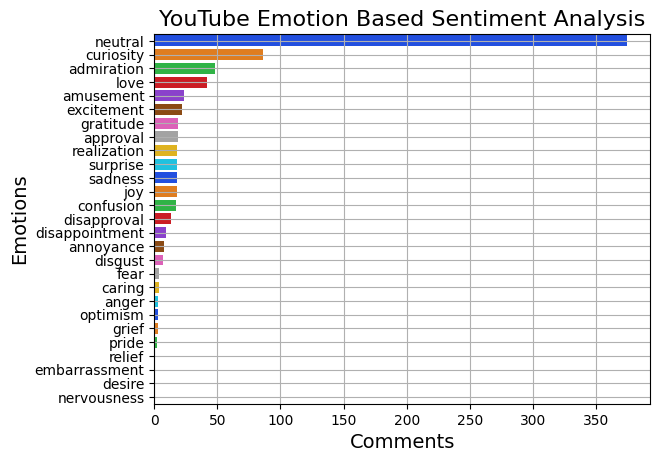

In [ ]:
#Creating Countplot to visulize Emotion based sentiment analysis
sns.countplot(y = "Emotions", data = comments_analytics, color = None, palette = "bright", order = comments_analytics["Emotions"].value_counts().index)
plt.title("YouTube Emotion Based Sentiment Analysis", fontsize = 16)
plt.xlabel("Comments", fontsize = 14)
plt.ylabel("Emotions", fontsize = 14)
plt.grid()

In [ ]:
#Workin with Comments column
comments = comments_analytics["Comments"]

In [ ]:
comments

0                                    I miss her so much.
1      I love seeing the light of possibilities when ...
2      The original name of this effect is "The Nine ...
3                                 I miss my physics girl
4                                                   loll
                             ...                        
778                                      First or not :V
779                                                First
780                                     My DONG is ready
781                                               First!
782                                                   1?
Name: Comments, Length: 783, dtype: object

In [ ]:
#Function to preprocess Comments to visualize them in word cloud
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()
def preprocess_comments(text):
  text = contractions.fix(text)
  text = re.sub("http\S+", "", text)
  text = re.sub("\n", "", text)
  text = preprocessing.normalize.unicode(text)
  text = preprocessing.normalize.hyphenated_words(text)
  text = preprocessing.normalize.quotation_marks(text)
  text = preprocessing.normalize.whitespace(text)
  text = preprocessing.remove.accents(text)
  text = preprocessing.remove.brackets(text)
  text = preprocessing.remove.html_tags(text)
  text = preprocessing.remove.punctuation(text)
  text = preprocessing.replace.currency_symbols(text, "")
  text = preprocessing.replace.emails(text, "")
  text = preprocessing.replace.emojis(text, "")
  text = preprocessing.replace.hashtags(text, "")
  text = preprocessing.replace.numbers(text, "")
  text = preprocessing.replace.phone_numbers(text, "")
  text = preprocessing.replace.urls(text, "")
  text = preprocessing.replace.user_handles(text, "")

  text = text.lower()
  words = word_tokenize(text)
  words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
  return words

<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
/tmp/ipython-input-3314129257.py:6: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub("http\S+", "", text)


In [ ]:
#Applying function on comments
comments = comments.apply(preprocess_comments)

In [ ]:
comments

0                                           [miss, much]
1      [love, seeing, light, possibility, realize, di...
2      [original, name, effect, nine, card, problem, ...
3                                   [miss, physic, girl]
4                                                 [loll]
                             ...                        
778                                           [first, v]
779                                              [first]
780                                        [dong, ready]
781                                              [first]
782                                                   []
Name: Comments, Length: 783, dtype: object

In [ ]:
#Converting comments to single list
preprocessed_comments = []
for comment in comments:
  comment = " ".join(comment)
  preprocessed_comments.append(comment)

In [ ]:
preprocessed_comments

['miss much',
 'love seeing light possibility realize different reveals',
 'original name effect nine card problem recent year amazing variation routine developed strengthen effect broadening general appeal',
 'miss physic girl',
 'loll',
 '',
 'guy showed church spelled tolot spelled oed spelled ho',
 'weird seeing video physicsgirl well channel',
 'far youtubers like called ding dongerbonerguygregand would change world',
 'mathemagician',
 'diana laugh priceless',
 'thanks whatching',
 'intro still relevanthe said ding',
 'since friend likely watch video one show card trick unless make new friend getting morning coffee weird conversation path segway speaking card magic trick',
 'wonder work french',
 'pooooooooooooop',
 'tested queen club card well',
 'sequel math magic',
 'michael wife',
 'come one talking card literally set differently',
 'always say thanks watching',
 'nice mmm episode',
 'doc delorean',
 'else know fact watch evan era tv',
 'also learnt magic along michael',
 'pi

In [ ]:
#Appending Preprocessed comments to original data frame
comments_analytics["Preprocessed Comments"] = preprocessed_comments

In [ ]:
comments_analytics

Authors                                  Author Urls  \
0              @F1sh_king            http://www.youtube.com/@F1sh_king   
1         @johnmaynard869       http://www.youtube.com/@johnmaynard869   
2      @AbsoluteMathMagic    http://www.youtube.com/@AbsoluteMathMagic   
3           @majortom4543         http://www.youtube.com/@majortom4543   
4       @CubingEmperor313     http://www.youtube.com/@CubingEmperor313   
..                    ...                                          ...   
778        @DreamyDaylite        http://www.youtube.com/@DreamyDaylite   
779      @loughlinlee2366      http://www.youtube.com/@loughlinlee2366   
780            @nerdporks            http://www.youtube.com/@nerdporks   
781  @scramblerbricks7293  http://www.youtube.com/@scramblerbricks7293   
782    @jacksontisler8333    http://www.youtube.com/@jacksontisler8333   

                                              Comments  Likes  \
0                                  I miss her so much.      2   
1    I love seeing the light of possibilities when ...      0   
2    The original name of this effect is "The Nine ...      0   
3                               I miss my physics girl      8   
4                                                 loll      0   
..                                                 ...    ...   
778                                    First or not :V      0   
779                                              First      0   
780                                   My DONG is ready      0   
781                                             First!      0   
782                                                 1?      2   

             Published At            Updated At    Emotions  \
0    2024-08-12T09:08:12Z  2024-08-12T09:08:12Z     sadness   
1    2024-07-10T01:03:29Z  2024-07-10T01:03:29Z        love   
2    2024-05-20T02:35:47Z  2024-05-20T02:35:47Z  admiration   
3    2024-01-29T09:39:19Z  2024-01-29T09:39:19Z     sadness   
4    2023-12-31T02:41:22Z  2023-12-31T02:41:22Z     neutral   
..                    ...                   ...         ...   
778  2018-06-19T00:35:40Z  2018-06-19T00:35:40Z     neutral   
779  2018-06-19T00:35:37Z  2018-06-19T00:35:37Z     neutral   
780  2018-06-19T00:35:37Z  2018-06-19T00:35:37Z  excitement   
781  2018-06-19T00:35:28Z  2018-06-19T00:35:28Z     neutral   
782  2018-06-19T00:35:28Z  2018-06-19T00:35:28Z     neutral   

                                 Preprocessed Comments  
0                                            miss much  
1    love seeing light possibility realize differen...  
2    original name effect nine card problem recent ...  
3                                     miss physic girl  
4                                                 loll  
..                                                 ...  
778                                            first v  
779                                              first  
780                                         dong ready  
781                                              first  
782                                                     

[783 rows x 8 columns]

In [ ]:
#Accessing Preprocessed Comments and Emotions in different data frame
comments_emotions = comments_analytics[["Preprocessed Comments", "Emotions"]]

In [ ]:
comments_emotions

Preprocessed Comments    Emotions
0                                            miss much     sadness
1    love seeing light possibility realize differen...        love
2    original name effect nine card problem recent ...  admiration
3                                     miss physic girl     sadness
4                                                 loll     neutral
..                                                 ...         ...
778                                            first v     neutral
779                                              first     neutral
780                                         dong ready  excitement
781                                              first     neutral
782                                                        neutral

[783 rows x 2 columns]

In [ ]:
#Grouping Emotions together
emotion_group = comments_emotions.groupby("Emotions")

In [ ]:
#Emotes to set
emotes = set(comments_emotions["Emotions"])

In [ ]:
len(emotes)

27

# Generating Word Clouds

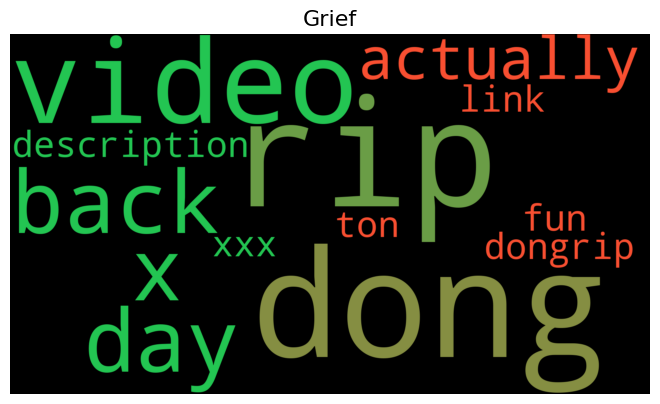

```````````````````````````````````````````````````````````````````


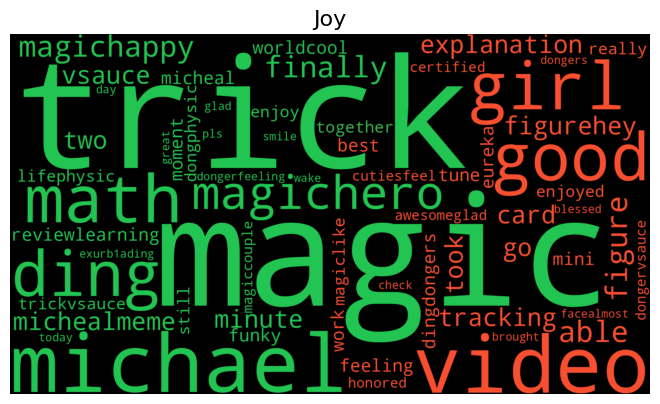

```````````````````````````````````````````````````````````````````


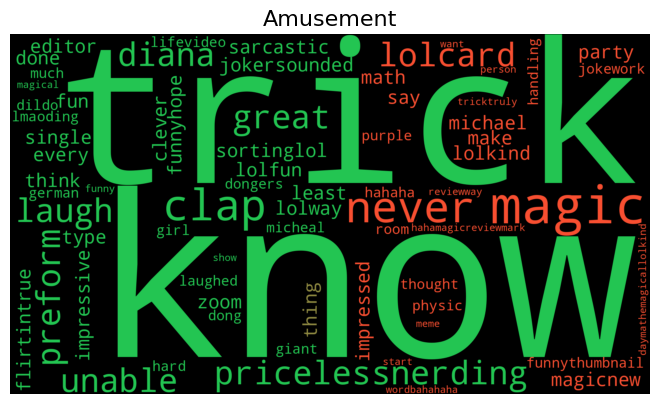

```````````````````````````````````````````````````````````````````


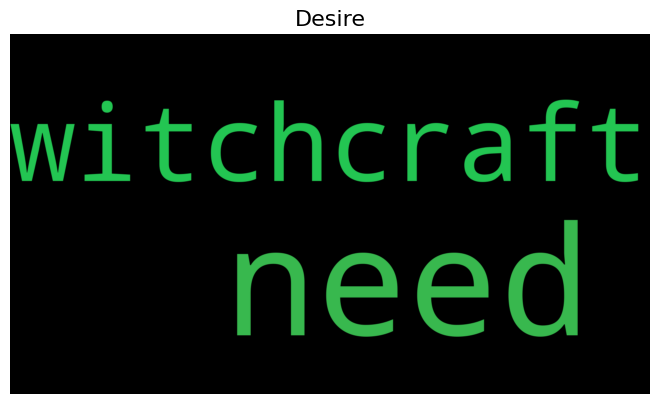

```````````````````````````````````````````````````````````````````


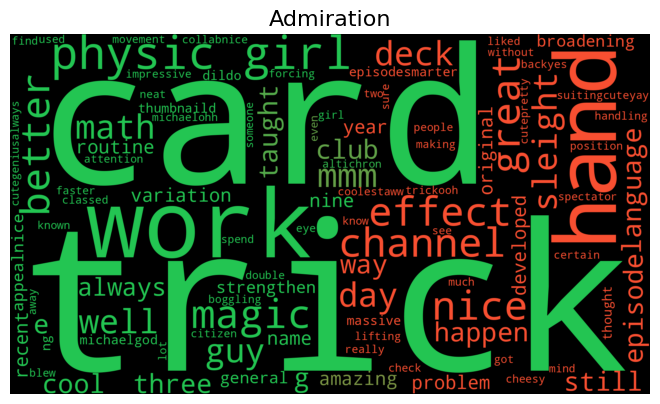

```````````````````````````````````````````````````````````````````


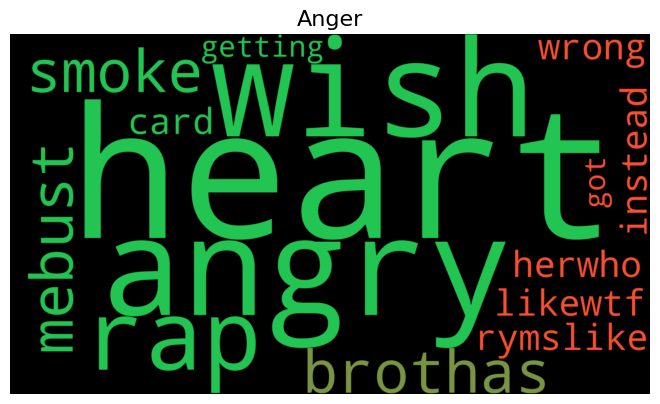

```````````````````````````````````````````````````````````````````


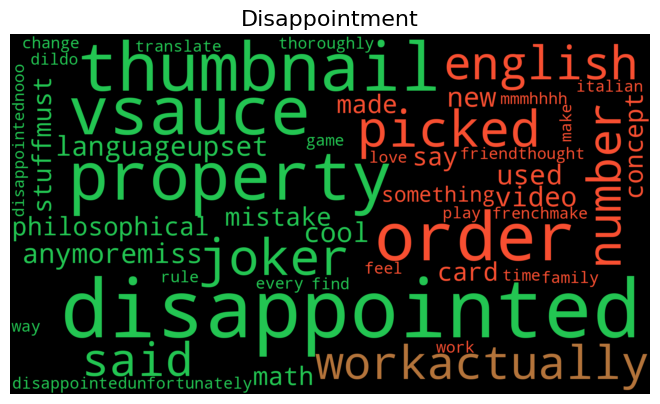

```````````````````````````````````````````````````````````````````


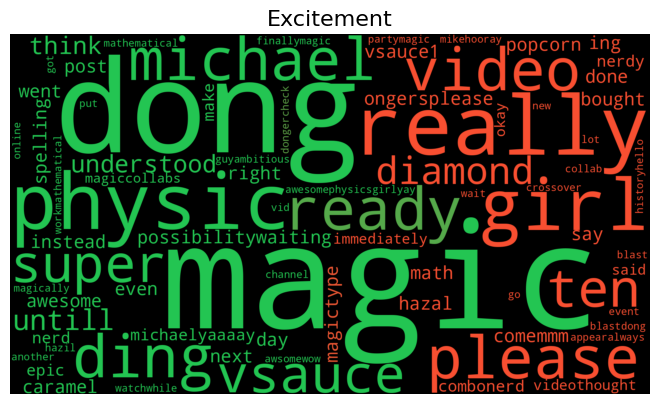

```````````````````````````````````````````````````````````````````


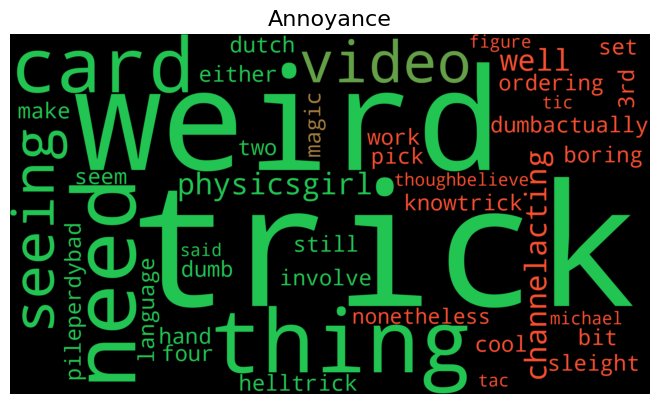

```````````````````````````````````````````````````````````````````


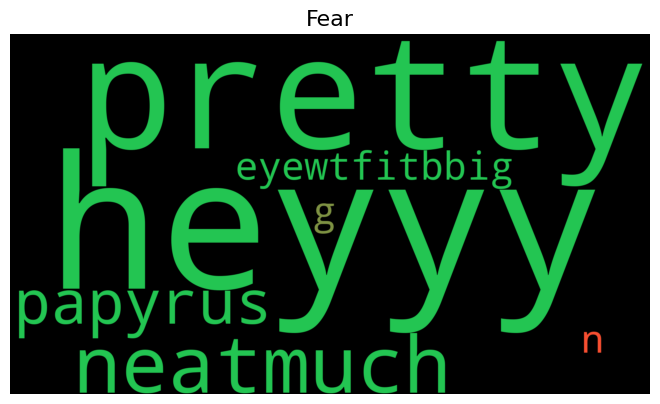

```````````````````````````````````````````````````````````````````


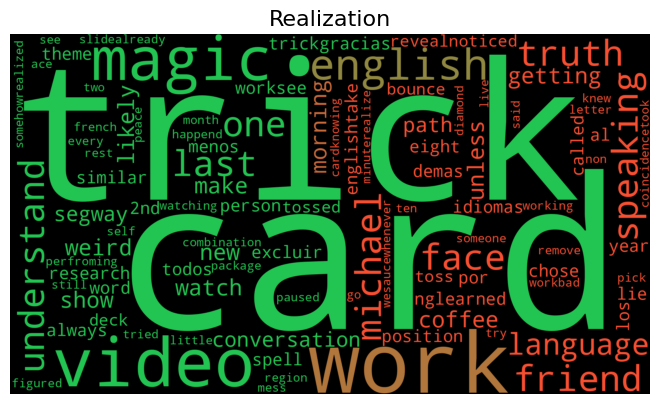

```````````````````````````````````````````````````````````````````


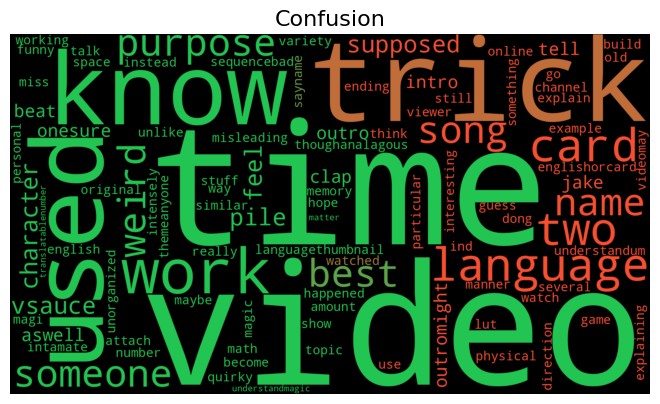

```````````````````````````````````````````````````````````````````


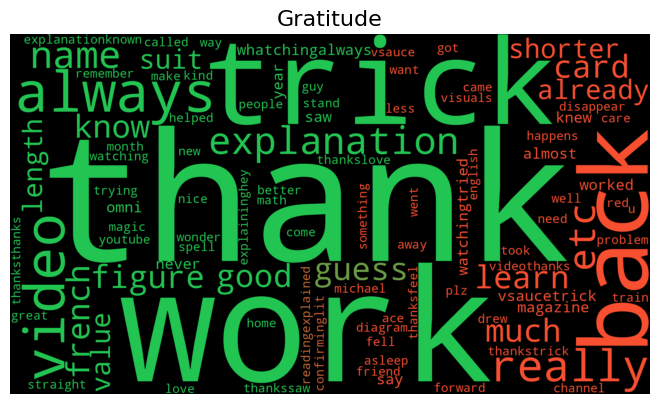

```````````````````````````````````````````````````````````````````


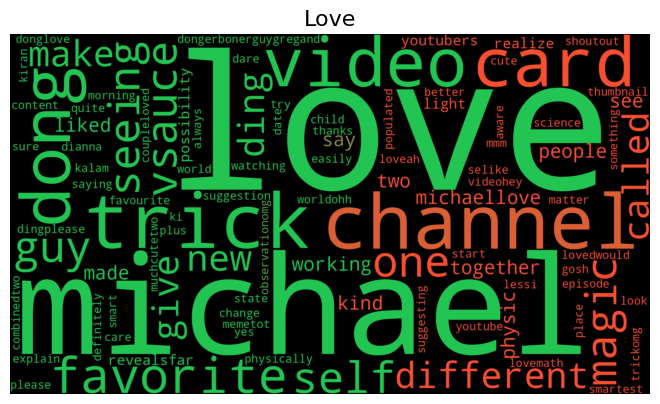

```````````````````````````````````````````````````````````````````


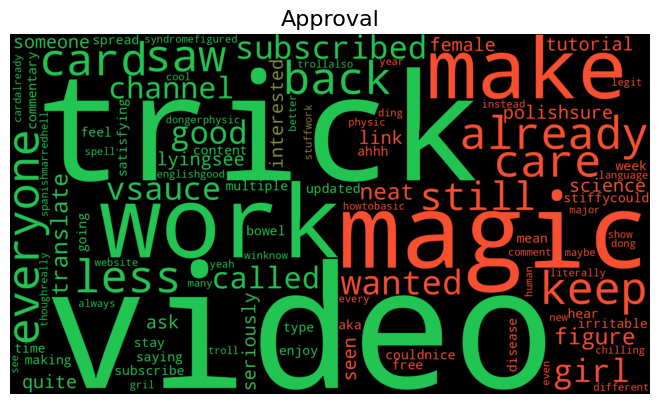

```````````````````````````````````````````````````````````````````


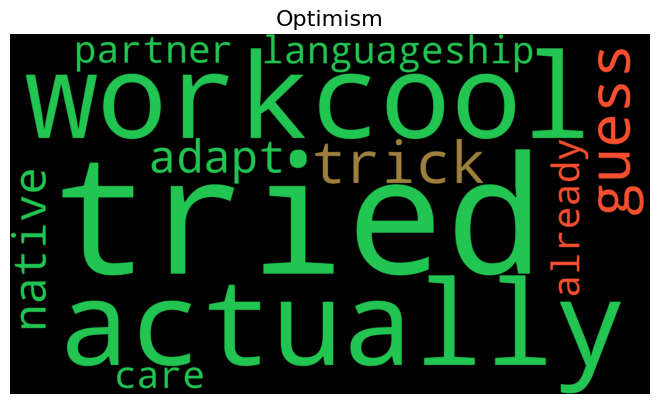

```````````````````````````````````````````````````````````````````


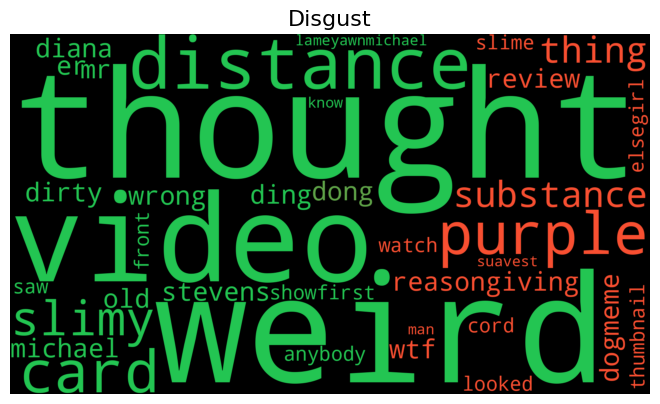

```````````````````````````````````````````````````````````````````


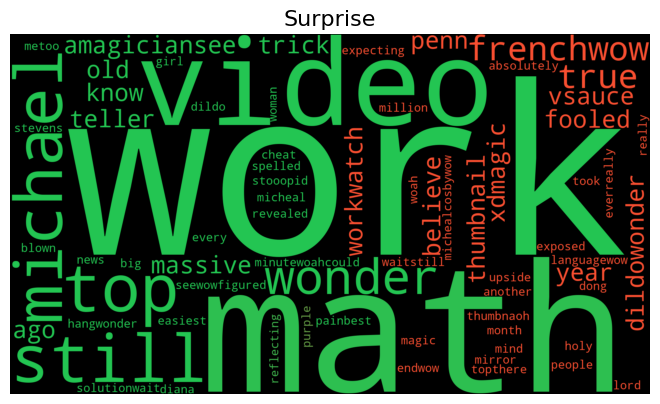

```````````````````````````````````````````````````````````````````


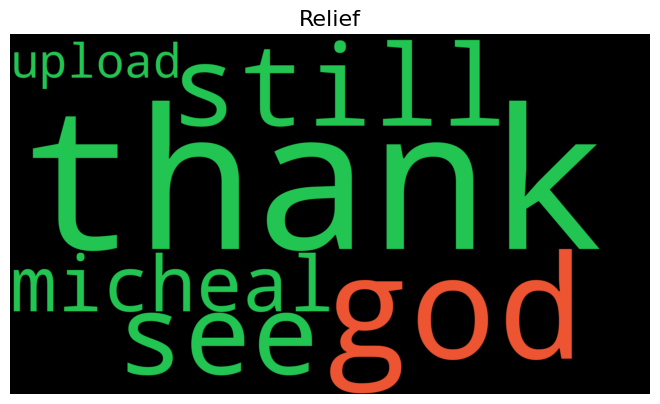

```````````````````````````````````````````````````````````````````


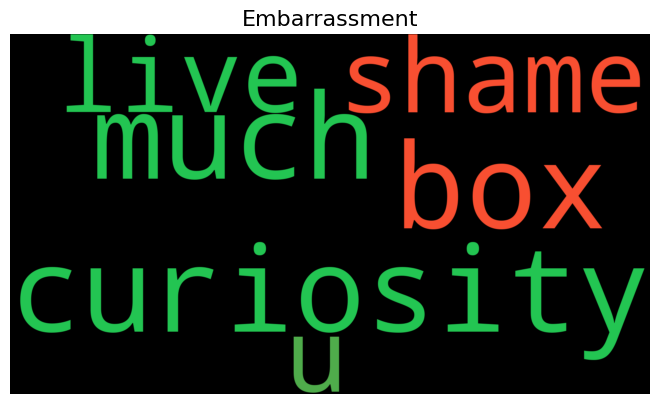

```````````````````````````````````````````````````````````````````


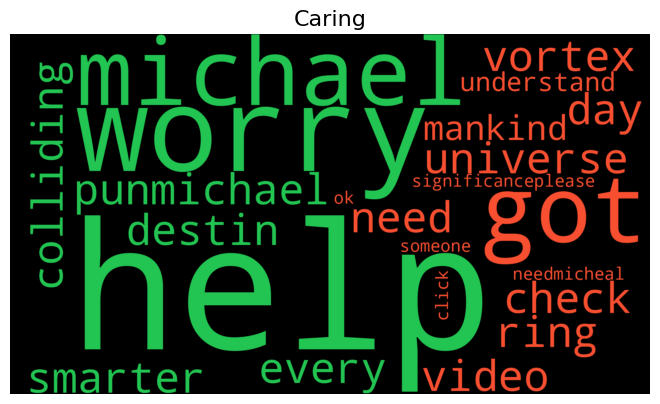

```````````````````````````````````````````````````````````````````


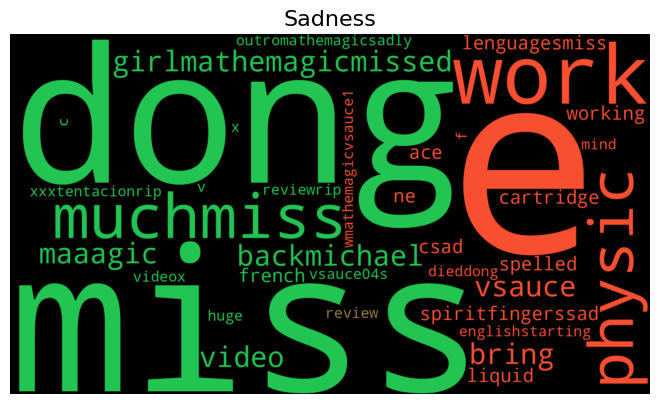

```````````````````````````````````````````````````````````````````


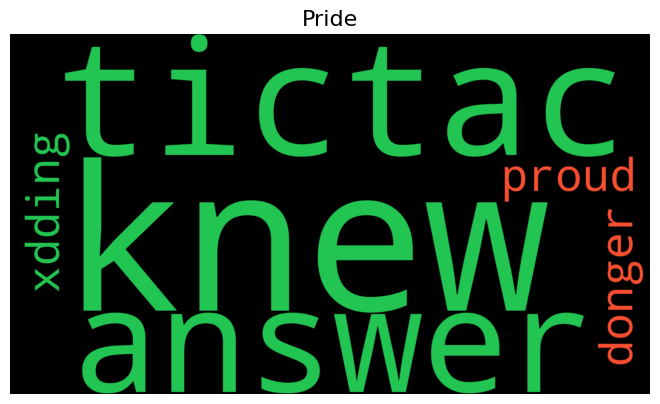

```````````````````````````````````````````````````````````````````


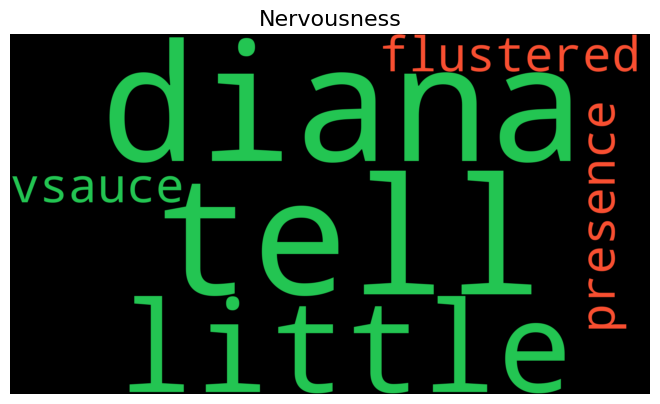

```````````````````````````````````````````````````````````````````


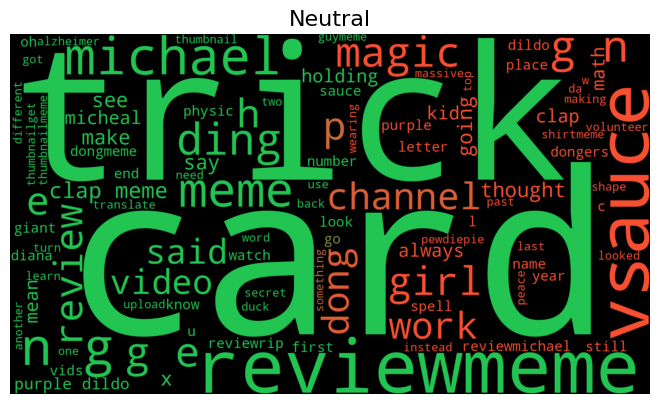

```````````````````````````````````````````````````````````````````


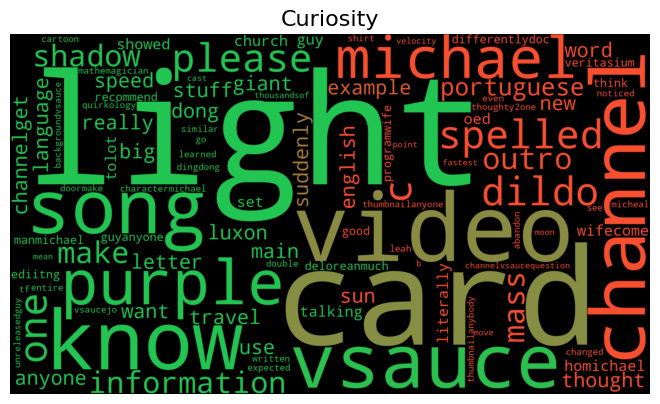

```````````````````````````````````````````````````````````````````


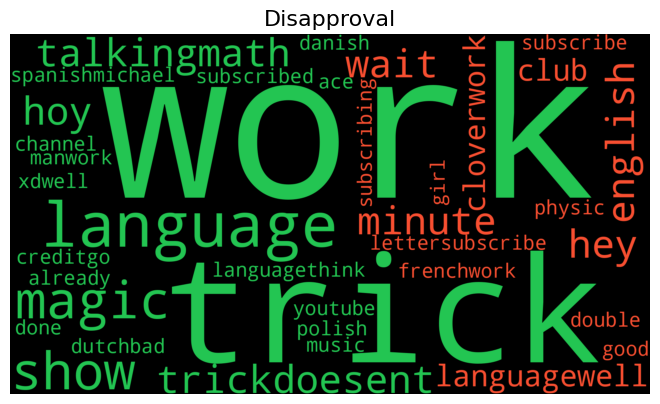

```````````````````````````````````````````````````````````````````


In [ ]:
#Accessing different emotion groups, converting them to list, convertnig lists to sring data and creating W

for e in emotes:
  list_emotes = emotion_group.get_group(e)["Preprocessed Comments"].tolist()
  comment_count = len(list_emotes)

  if not list_emotes:
    print(f"⚠️ Skipping {e}, no comments found.")
    continue

  emotes_data = "".join(list_emotes).strip()

  if not emotes_data:
    print(f"⚠️ Skipping '{e}', no valid words to generate wordcloud.")
    continue


  wordcloud = WordCloud(background_color = "black", width = 1000, height = 800, max_words = 100, colormap = "Reds").generate(emotes_data)
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.title(f"{e.capitalize()}     Comments: {comment_count}", fontsize = 20)

  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.savefig(f"wordclouds/{e}.png", dpi = 450)
  plt.show()

  print("```````````````````````````````````````````````````````````````````")